Lección 1 --- series con grado o cogrado arbitrarios
====================================================

**Author:** Marcos Bujosa



## Ejemplos de algunas series e inversas de series



### Inversa con final e inversa con principio de un polinomio de grado uno



Más abajo ([sección 2](implementacion_series_formales.md)) aparece una implementación en Python de las series con principio (con cogrado) y las series con final (con grado). Dicha implementación consiste en la definición de dos clases: la clase `SerieConPrincipio` y la clase `SerieConFinal`. 



El siguiente bloque de código es para que este cuaderno electrónico (notebook) lea el [implementacion\_series\_formales.py](./implementacion_series_formales.py) de python con la definición de ambas clases:



In [1]:
#import warnings
#warnings.filterwarnings("ignore", category=UserWarning)
%run -i implementacion_series_formales.py

Los ejemplos de más abajo usan un parámetro simbólico para mayor claridad. El bloque de código que puede ver a continuación define dicho parámetro simbólico $a$.



In [2]:
from sympy import symbols
a = symbols('a')

#### Polinomio como `SerieConPrincipio` y su inversa



Definimos el polinomio $1 - az$ como una `SerieConPrincipio` con cogrado 0:



In [3]:
p=SerieConPrincipio([1,-a],0)
p

(0, [Fraction(1, 1), -a])

Su inversa $p^{-\triangleright}$ (en el conjunto de series *con principio*) es:



In [4]:
número_coeficientes = 6
p.inversa(número_coeficientes)

(0, [Fraction(1, 1), a, a**2, a**3, a**4, a**5])

(donde hemos indicado cuántos coeficientes queremos mostrar)

Fíjese que su inversa (*con principio*) tiene cogrado $0$.



**Nota.** Al haber creado este polinomio como un elemento de la clase `SerieConPrincipio`, el procedimiento `.inversa()` genera la inversa como una serie con principio (con cogrado). A esta inversa la hemos denotado con $p^{-\triangleright}$ en la lección correspondiente.



Mediante gráficos podemos ver el comportamiento de los coeficientes para distintos valores del parámetro $a$. Para estos dibujos calcularemos 15 coeficientes y sustituiremos el parámetro $a$ por un `valor` concreto en cada caso.



##### Para valores de $a$ menores a 1 en valor absoluto (**raíz fuera del círculo unidad**)



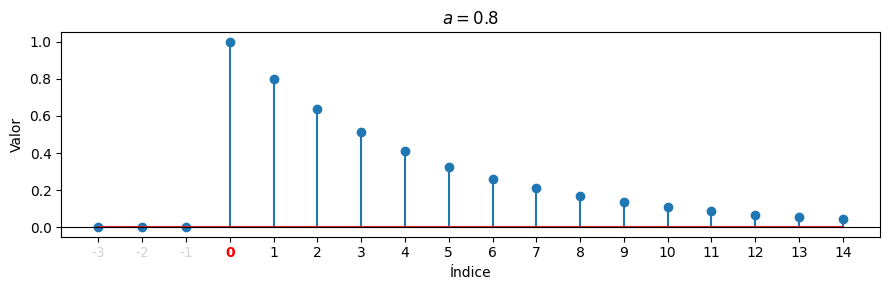

In [5]:
valor = 0.8
p.inversa(15).subs((a,valor)).plot_serie(title='$a='+str(valor)+'$')

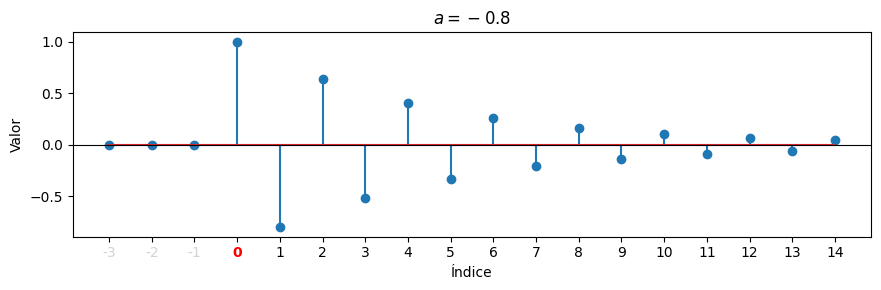

In [6]:
valor = -0.8
p.inversa(15).subs((a,valor)).plot_serie(title='$a='+str(valor)+'$')

*Para polinomios con raíces fuera del círculo unidad los coeficientes de la inversa* (con principio $p^{-\triangleright}$) *se aproximan a 0 cuando los índices crecen.* 

Éste es el caso en el que  $p^{-\triangleright}=p^{-1}$ (inversa absolutamente sumable).



##### Para valores de $a$ iguales a 1 en valor absoluto (**raíz sobre el círculo unidad**)



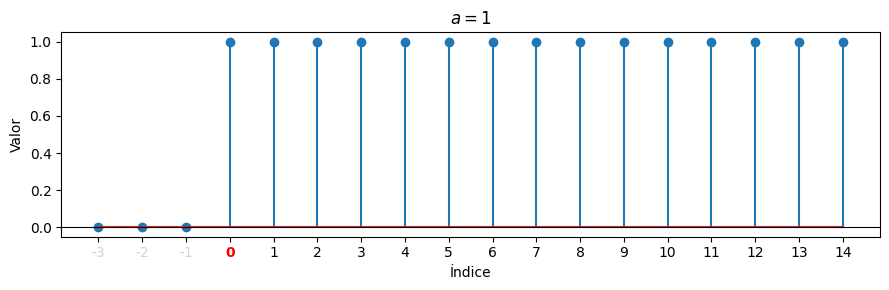

In [7]:
valor = 1
p.inversa(15).subs((a,valor)).plot_serie(title='$a='+str(valor)+'$')

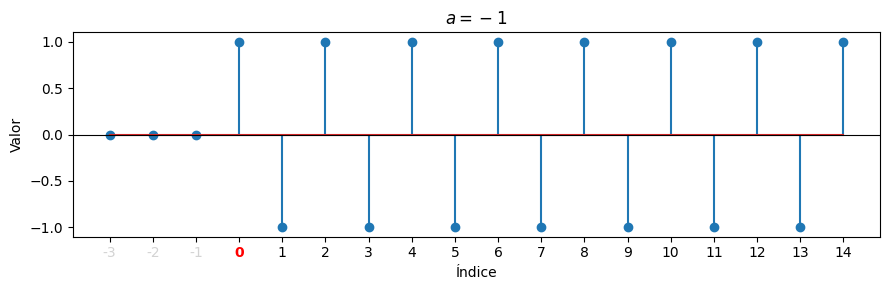

In [8]:
valor = -1
p.inversa(15).subs((a,valor)).plot_serie(title='$a='+str(valor)+'$')

*Para polinomios con raíces en el círculo unidad los coeficientes de la inversa mantienen patrones estables.*



##### Para valores de $a$ mayores a 1 en valor absoluto (**raíz en el interior del círculo unidad**)



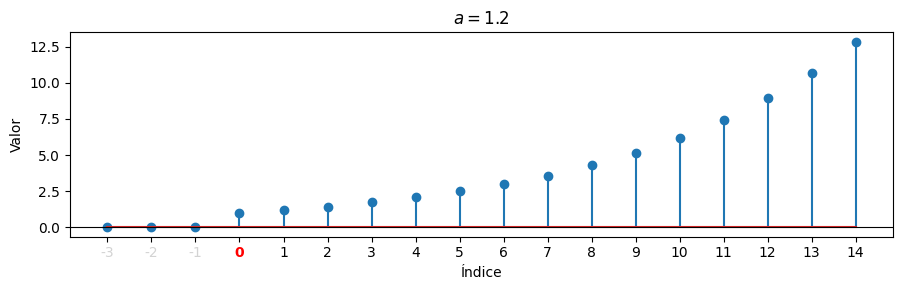

In [9]:
valor = 1.2
p.inversa(15).subs((a,valor)).plot_serie(title='$a='+str(valor)+'$')

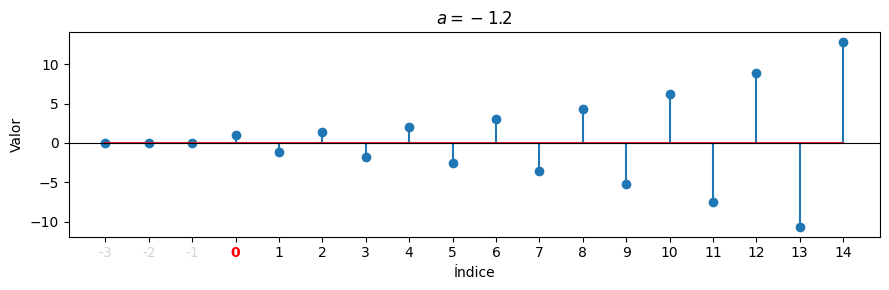

In [10]:
valor = -1.2
p.inversa(15).subs((a,valor)).plot_serie(title='$a='+str(valor)+'$')

*Para polinomios con raíces dentro del círculo unidad los coeficientes de la inversa* (con principio $p^{-\triangleright}$) *crecen exponencialmente cuando los índices crecen.*



Recuerde que **la inversa de un polinomio es una serie con infinitos términos**. Como esta implementación en Python solo calcula una cantidad finita de términos, el producto del polinomio por la serie calculada no es exactamente $1$, aunque nos podemos aproximar a la inversa tanto como queramos (dentro de las capacidades del ordenador).



Si calculamos solo cinco términos de la inversa, se anulan todos los coeficientes excepto el quinto (y el $1$ de la posición $0$):



In [11]:
p * p.inversa()

(0, [Fraction(1, 1), 0, 0, 0, 0, -a**5])

Con solo cincuenta términos se anulan todos excepto el quincuagésimo (y el $1$ de la posición $0$):



In [12]:
p * p.inversa(50)

(0, [Fraction(1, 1), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -a**50])

Con quinientos se anulan todos excepto el parámetro en la posición 500 (y el $1$ de la posición $0$):



In [13]:
p * p.inversa(500)

(0, [Fraction(1, 1), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -a**500])

Fíjese que si $a\ne0$, el producto `p*(p.inversa(500))` no calcula exactamente la serie $1$ (la que tienen un $1$ en la posición $0$ y es nula en todas las demás posiciones). Nótese que la componente correspondiente a la posición 500 es distinta de cero (su magnitud es $a^{500}$). Por tanto, `p.inversa(500)` no es realmente la inversa de `p`. Fíjese que la serie `p.inversa(500)` solo tiene 500 términos no nulos; sin embargo, la serie (con cogrado) que verdaderamente es inversa del polinomio `p` requiere de infinitos términos no nulos (algo que esta implementación en Python no calcula).



#### Polinomio como `SerieConFinal`



Ahora vamos a definir exactamente el mismo polinomio, pero en esta ocasión lo haremos como una `SerieConFinal` (con `grado` igual a 1).



In [14]:
p2=SerieConFinal([1,-a],1)
p2

(1, [Fraction(1, 1), -a])

Su inversa $p^{\blacktriangleleft-}$ (en el conjunto de series *con final*) es:



In [15]:
p2.inversa()

(-1, [-1/a**5, -1/a**4, -1/a**3, -1/a**2, -1/a])

Fíjese que como el grado del polinomio `p2` es 1, el grado de $p^{\blacktriangleleft-}$ es $-1.$



**Nota.** Al haber creado este polinomio como un elemento de la clase `SerieConFinal`, el procedimiento `.inversa()` genera la inversa como una serie con final (con grado). A esta inversa la hemos denotado con $p^{\blacktriangleleft-}$ en la lección correspondiente.



Veamos con unos gráficos el comportamiento de los coeficientes de esta nueva inversa $p^{\blacktriangleleft-}$ para distintos valores del parámetro $a$.



##### Para valores de $a$ menores a 1 en valor absoluto (**raíz fuera del círculo unidad**)



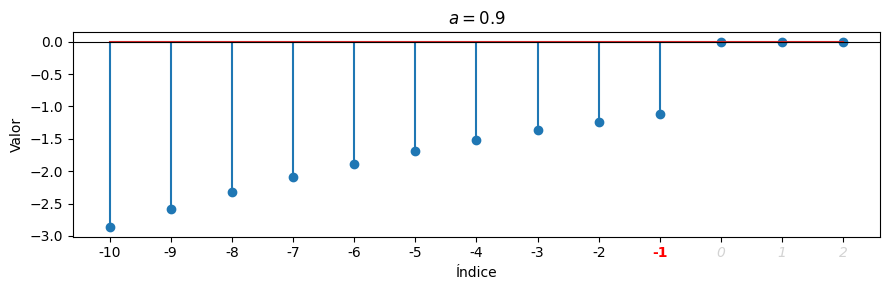

In [16]:
valor = 0.9
p2.inversa(10).subs((a,valor)).plot_serie(title='$a='+str(valor)+'$')

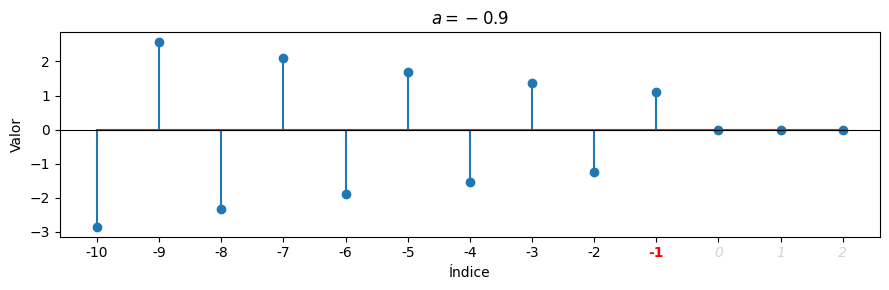

In [17]:
valor = -0.9
p2.inversa(10).subs((a,valor)).plot_serie(title='$a='+str(valor)+'$')

*Para polinomios con raíces fuera del círculo unidad los coeficientes de la inversa* (con final $p^{\blacktriangleleft-}$) *crecen exponencialmente cuando los índices decrecen.*



##### Para valores de $a$ iguales a 1 en valor absoluto (**raíz sobre el círculo unidad**)



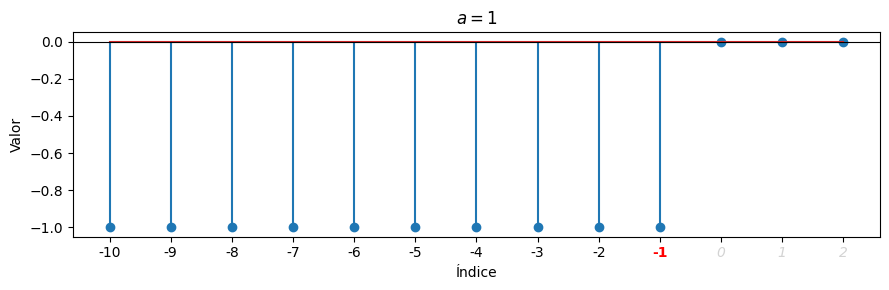

In [18]:
valor = 1
p2.inversa(10).subs((a,valor)).plot_serie(title='$a='+str(valor)+'$')

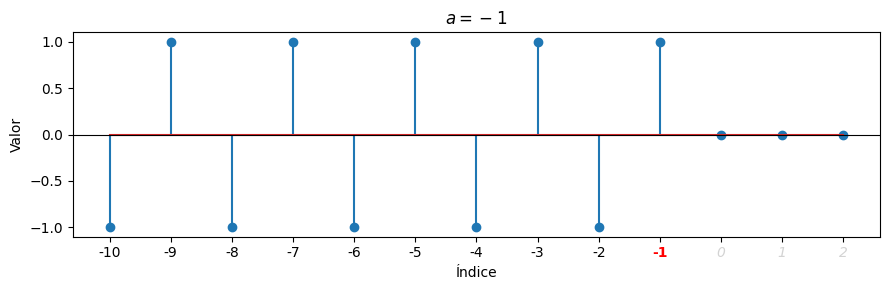

In [19]:
valor = -1
p2.inversa(10).subs((a,valor)).plot_serie(title='$a='+str(valor)+'$')

*Para polinomios con raíces en el círculo unidad los coeficientes de la inversa mantienen patrones estables.*



##### Para valores de $a$ mayores a 1 en valor absoluto (**raíz en el interior del círculo unidad**)



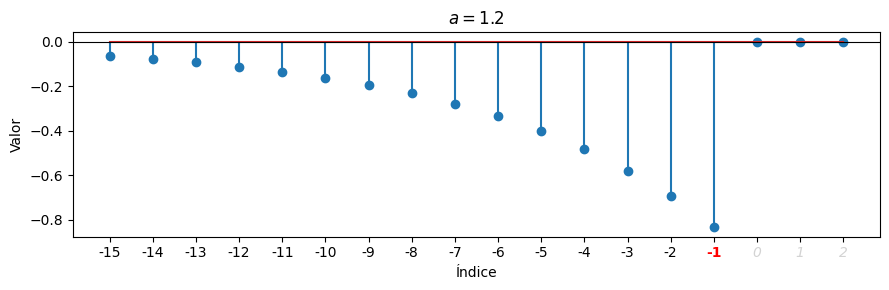

In [20]:
valor = 1.2
p2.inversa(15).subs((a,valor)).plot_serie(title='$a='+str(valor)+'$')

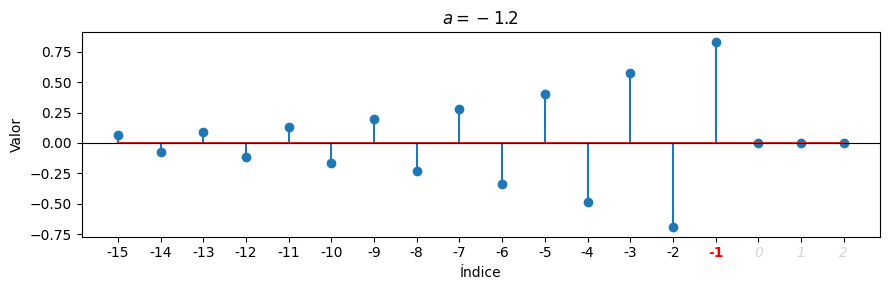

In [21]:
valor = -1.2
p2.inversa(15).subs((a,valor)).plot_serie(title='$a='+str(valor)+'$')

*Para valores de $a$ mayores a 1 en valor absoluto los coeficientes de la inversa* (con final $p^{\blacktriangleleft-}$) *se aproximan a 0 cuando los índices decrecen.* 

Este es el caso en el que  $p^{\blacktriangleleft-}=p^{-1}$ (inversa absolutamente sumable).



### Otro ejemplo de serie y dos inversas



In [22]:
lista = [1, -.1, -.75]
s_cp = SerieConPrincipio(lista, -1)
s_cp

(-1, [1.0, -0.1, -0.75])

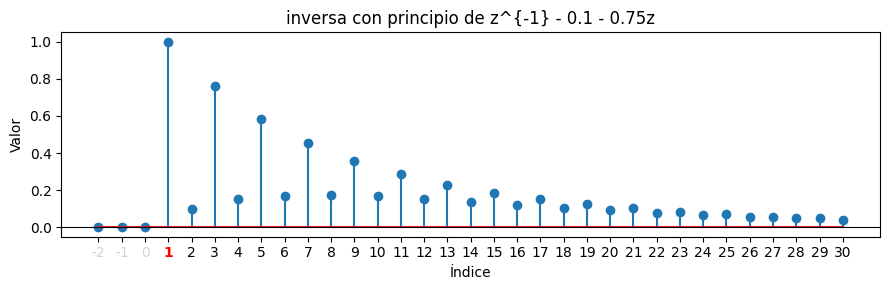

In [23]:
s_cp.inversa(30).plot_serie(title='inversa con principio de ' + s_cp.latex())

In [24]:
s_cf=SerieConFinal(lista, 1)
s_cf

(1, [1.0, -0.1, -0.75])

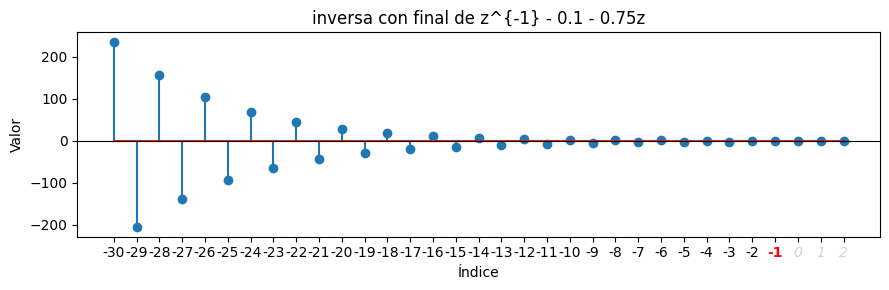

In [25]:
s_cf.inversa(30).plot_serie(title='inversa con final de ' + s_cp.latex())

## Implementación de series con principio y series con final



### Clase `SerieConPrincipio`: series con cogrado arbitrario en Python



Este documento implementa en Python una clase llamada `SerieConPrincipio` que representa series formales con índice inicial (con cogrado) arbitrario y otra llamada `SerieConFinal` que representa series con índice final (con grado) arbitrario. Ello nos permitirá trabajar con series que comienzan, por ejemplo, en $ z^{-2} $ o $ z^3 $; y poder operar con ellas como si fueran polinomios infinitos, incluyendo suma, producto y cálculo de inversas.



#### Importación de librerías



Estas series podrán contener números racionales exactos (usando la clase `Fraction`) o flotantes, así como parámetros simbólicos. Por ello
necesitamos `latex` y `Rational` de `sympy` para la representación como funciones generatrices en formato $\LaTeX{}$, y `Fraction` para mantener exactitud.
Con `sympy` podremos sustituir los parámetros simbólicos por valores concretos y con `matplotlib.pyplot` podremos representar gráficamente una parte de estas series.



    from sympy import latex, Rational
    from fractions import Fraction
    import sympy
    from sympy import Add
    import matplotlib.pyplot as plt
    from IPython.display import display, Math, display_png, Latex
    import tempfile
    from os.path import join           



#### Métodos generales para representar los objetos correctamente en Jupyter Notebook



    def html(TeX):
        """ Plantilla HTML para insertar comandos LaTeX """
        return "<p style=\"text-align:center;\">$" + TeX + "$</p>"
    
    def latex(a):
        """Método latex general"""
        try:
            return a.latex()
        except:
            return sympy.latex(a)
    
    def pinta(data):
        """Muestra en Jupyter la representación latex de data"""
        display(Latex('$$'+latex(data)+'$$'))
        #display(Math(latex(data)))



#### Declaración de la clase `SerieConPrincipio`



Declaramos la clase `SerieConPrincipio` y la documentamos:

    class SerieConPrincipio:
        """
        Clase para representar series con un índice inicial arbitrario.
    
        Atributos:
        - coeficientes (list): Lista de coeficientes de la serie, sin ceros iniciales.
        - cogrado (int): Índice del primer coeficiente no nulo de la serie.
        - usa_float (bool): Indica si la serie opera con números flotantes.
        - final (bool): Indica si el final de la serie se representa con una elipsis.
    
        Métodos:
        - __repr__: Representa la serie como un par (cogrado, lista de coeficientes).
        - _repr_latex_: Representa la serie en formato LaTeX.
        - __add__: Suma dos SerieConPrincipio.
        - __mul__: Producto por un escalar o producto convolución entre SerieConPrincipio.
        - __rmul__: Producto por un escalar desde la izquierda.
        - inversa: Calcula la SerieConPrincipio inversa.
        """



#### Constructor



El constructor elimina ceros iniciales y ajusta el índice inicial (cogrado).

    def __init__(self, coeficientes, cogrado=0, final=False, RepEscalera=False):
        primeros_no_nulos = next((i for i, c in enumerate(coeficientes) if c != 0), None)
        if primeros_no_nulos is None:
            self.coeficientes = []
            self.cogrado = 0
        else:
            self.coeficientes = coeficientes[primeros_no_nulos:]
            self.cogrado = cogrado + primeros_no_nulos
    
        self.final = final
        self.usa_float = any(isinstance(c, float) for c in self.coeficientes if not hasattr(c, 'is_number'))
        self.coeficientes = [
            float(c) if self.usa_float and isinstance(c, (int, float)) else Fraction(c) if isinstance(c, (int, float)) else c
            for c in self.coeficientes
        ]
        self.RepEscalera=RepEscalera



#### Representaciones: texto y $\LaTeX{}$



Métodos para mostrar la serie como par ordenado `(cogrado, lista de coeficientes)` o en formato LaTeX. En los cuadernos electrónicos de Jupyter (Notebboks) se usa por defecto la representación $\LaTeX{}$ como función generatriz. Y si la serie se ha calculado como una inversa, la representación termina con una elipsis ($\cdots$) para recordar que la serie debería tener infinitos términos. Esta implementación no calcula infinitos términos, con `print(serie)` vemos su cogrado y una lista con los coeficientes que realmente se han calculado (por defecto son 5 si no se indica un número concreto).

    def __repr__(self):
        """
        Representa la serie como un par (cogrado, lista de coeficientes).
    
        Retorna:
        - str: Representación de la serie como un par.
        """
        return f"({self.cogrado}, {self.coeficientes})"
    
    def latex(self):
        """
        Representa la serie en formato LaTeX.
    
        Retorna:
        - str: Representación en formato LaTeX.
        """
    
        if not self.coeficientes:
            return "$0$"
    
        terminos = []
        for i, coef in enumerate(self.coeficientes):
            indice = self.cogrado + i
            if coef != 0:
                coef_sympy = Rational(coef.numerator, coef.denominator) if isinstance(coef, Fraction) else coef
                coef_latex = r"\left(" + latex(coef_sympy) + r"\right)" if  isinstance(coef_sympy, Add) else latex(coef_sympy)
                if coef_sympy == -1 and indice != 0:
                    coef_latex = "-"
                if coef_sympy == 1 and indice != 0:
                    coef_latex = ""
                if indice == 0:
                    terminos.append(f"{coef_latex}")
                elif indice == 1:
                    terminos.append(f"{coef_latex}z")
                else:
                    terminos.append(f"{coef_latex}z^{{{indice}}}")  # Aseguramos que el exponente esté entre llaves
        cadena = r' + \cdots' if self.final else ''
        #return '$'+ " + ".join(terminos).replace("+ -", "- ") + cadena +'$'
        return " + ".join(terminos).replace("+ -", "- ") + cadena 
    
    def _repr_latex_(self):
        """
        Representa la serie en formato LaTeX.
    
        Retorna:
        - str: Representación en formato LaTeX para notebooks de Jupyter.
        """
        return '$$'+self.latex()+'$$'
    
    def _repr_html_(self):
        """ Construye la representación para el entorno jupyter notebook """
        if self.RepEscalera:
            return html(self.escalera())
        else:
            return html(self.latex())
    
    #def _repr_png_(self):
    #    """ Representación png para el entorno jupyter en Emacs """
    #    try:
    #        expr = '$'+self.latex()+'$'
    #        workdir = tempfile.mkdtemp()
    #        with open(join(workdir, 'borrame.png'), 'wb') as outputfile:
    #            sympy.preview(expr, viewer='BytesIO', outputbuffer=outputfile)
    #        return open(join(workdir, 'borrame.png'),'rb').read()
    #    except:
    #        return '$'+self.latex()+'$'
    
    def coeficientesEscalera(self):
        coeficientes = list(self.coeficientes)  # Creamos una copia de la lista de coeficientes
    
        if self.cogrado > 0:
            coeficientes = [0]*self.cogrado + coeficientes
            origen = 0        
        else: # len(self.coeficientes) + self.cogrado > 0:
            coeficientes = coeficientes + [0]*(1 - self.cogrado - len(self.coeficientes))
            origen = -self.cogrado
            
        return coeficientes, origen
    
    def escalera(self):
        coeficientes, origen = self.coeficientesEscalera()
        celdas = [r'\cdots 0'] + [r'{\color{blue}{\{' + str(c) + '\}}}' if i == origen else f"{str(c)}" for i,c in enumerate(coeficientes)] + [r'\cdots']    
        size = len(celdas)-1
        contenido = ' & '.join(celdas)
        latex_representation = "\\begin{array}{" + "c|"*size + "c}\n\\hline\n"
        latex_representation += f"{contenido} \\\\\hline"
        latex_representation += r"\end{array}"
        return '$' + latex_representation + '$'



#### Suma de series



La suma ajusta los índices y suma término a término.

    def __add__(self, otra):
        """
        Suma dos series.
    
        Parámetros:
        - otra (SerieConPrincipio): Otra serie.
    
        Retorna:
        - SerieConPrincipio: La serie resultante de la suma.
        """
        cogrado = min(self.cogrado, otra.cogrado)
        indice_final = max(
            self.cogrado + len(self.coeficientes),
            otra.cogrado + len(otra.coeficientes),
        )
        coeficientes = []
        for i in range(cogrado, indice_final):
            coef1 = self.coeficientes[i - self.cogrado] if self.cogrado <= i < self.cogrado + len(self.coeficientes) else 0
            coef2 = otra.coeficientes[i - otra.cogrado] if otra.cogrado <= i < otra.cogrado + len(otra.coeficientes) else 0
            coeficientes.append(coef1 + coef2)
        return SerieConPrincipio(coeficientes, cogrado)



#### Producto: escalar y convolución



El método `__mul__` permite tanto el producto escalar como el producto de Cauchy entre dos series.

    def __mul__(self, escalar_o_otra):
        """
        Producto por un escalar o producto convolución entre series.
    
        Parámetros:
        - escalar_o_otra (float | SerieConPrincipio): Escalar o otra serie.
    
        Retorna:
        - SerieConPrincipio: La serie resultante del producto.
        """
        if isinstance(escalar_o_otra, (int, float, Fraction)):
            coeficientes = [coef * escalar_o_otra for coef in self.coeficientes]
            return SerieConPrincipio(coeficientes, self.cogrado)
        elif isinstance(escalar_o_otra, SerieConPrincipio):
            cogrado = self.cogrado + escalar_o_otra.cogrado
            coeficientes = [0.0 if self.usa_float else Fraction(0)] * (len(self.coeficientes) + len(escalar_o_otra.coeficientes) - 1)
            for i, coef1 in enumerate(self.coeficientes):
                for j, coef2 in enumerate(escalar_o_otra.coeficientes):
                    coeficientes[i + j] += coef1 * coef2
            return SerieConPrincipio(coeficientes, cogrado)
        else:
            raise TypeError("El operador * solo admite un escalar o otra SerieConPrincipio.")



#### Producto escalar desde la izquierda



    def __rmul__(self, escalar):
        """
        Producto por un escalar desde la izquierda.
    
        Parámetros:
        - escalar (float): Escalar para multiplicar la serie.
    
        Retorna:
        - SerieConPrincipio: La serie resultante del producto.
        """
        return self.__mul__(escalar)



#### Inversa formal



Usamos recursión sobre la fórmula clásica de inversa de series: $ b_j = - \frac{1}{a_0} \sum_{r=1}^{j} a_{j-r} b_r $

    def inversa(self, num_terminos=5):
        """
        Calcula la inversa de la serie.
    
        Parámetros:
        - num_terminos (int): Número de términos de la inversa a calcular.
    
        Retorna:
        - SerieConPrincipio: La serie inversa.
        """
        if not self.coeficientes or self.coeficientes[0] == 0:
            raise ValueError("La primera componente no nula debe ser distinta de cero.")
    
        b = [0.0 if self.usa_float else 0] * num_terminos
        a0 = self.coeficientes[0]
    
        if self.usa_float:
            b[0] = 1.0 / a0
        else:
            try:
                if isinstance(a0, (int, Fraction)):
                    b[0] = Fraction(1, a0)
                else:
                    b[0] = 1 / a0
            except Exception as e:
                raise ValueError(f"No se pudo calcular el inverso del término inicial {a0}: {e}")
    
        for j in range(1, num_terminos):
            suma = sum(
                b[r] * self.coeficientes[j - r]
                for r in range(j)
                if j - r < len(self.coeficientes)
            )
            b[j] = -b[0] * suma
       
        return SerieConPrincipio(b, -self.cogrado, final=True)



#### Gráfico de la serie



    def plot_serie(self, indices_previos_al_cogrado=3, title="Serie con principio (con cogrado)"):
        """
        Dibuja la serie como un gráfico de barras.
        """
        indices_nulos = range(self.cogrado - indices_previos_al_cogrado, self.cogrado)
        valores_nulos = [0] * indices_previos_al_cogrado  # Coeficientes nulos
    
        indices = range(self.cogrado, self.cogrado + len(self.coeficientes))
        valores = self.coeficientes
    
        # Combina valores nulos y de la serie
        all_indices = list(indices_nulos) + list(indices)
        all_valores = valores_nulos + valores
    
        fig = plt.figure(figsize=(9, 3))
        plt.stem(all_indices, all_valores)
        plt.axhline(0, color='black', linewidth=0.8)
    
        # Etiquetas para los índices
        etiquetas = [str(int(idx)) for idx in all_indices]
        plt.xticks(all_indices, etiquetas)  # Establecer etiquetas en el eje X
    
        # Personalizar las etiquetas
        for i, idx in enumerate(all_indices):
            xtick_label = plt.gca().get_xticklabels()[i]  # Obtener la etiqueta actual
            if idx == self.cogrado:
                xtick_label.set_color('red')  # Cambiar color a rojo
                xtick_label.set_weight('bold')  # Cambiar a negrita
            elif idx < self.cogrado:
                xtick_label.set_color('#D3D3D3')  # Cambiar color a gris claro
    
        plt.xlabel("Índice")
        plt.ylabel("Valor")
        plt.title(title)
        plt.tight_layout()
        plt.close(fig)
        return fig



#### Sustitución simbólica



    def subs(self, reglasDeSustitucion=[]):
        """ Sustitución de variables simbólicas """
    
        def CreaLista(t):
            """Devuelve t si t es una lista; si no devuelve la lista [t]"""
            return t if isinstance(t, list) else [t]
    
        def sustitucion(elemento, regla_de_sustitucion):
            return sympy.S(elemento).subs(CreaLista(regla_de_sustitucion))
            
        coeficientes = [sustitucion(elemento, reglasDeSustitucion) for elemento in self.coeficientes]
        return SerieConPrincipio(coeficientes, self.cogrado)    



#### Ejemplo de uso



Creamos una serie desde $ z^2 $, otra desde $ z^0 $, y calculamos su suma, producto e inversa (truncada).

    s1 = SerieConPrincipio([1, 2, 3], 2)  # 1 z^2 + 2 z^3 + 3 z^4
    s2 = SerieConPrincipio([1, -1], 0)   # 1 - z
    
    print("Serie 1:", s1)
    print("Serie 2:", s2)
    print("Suma:", s1 + s2)
    print("Producto:", s1 * s2)
    print("Inversa de s2 (hasta z^5):", s2.inversa(6))



### Clase `SerieConFinal`: series con grado arbitrario en python



    class SerieConFinal:
        """
        Clase para representar series con un índice final arbitrario (grado).
    
        Atributos:
        - coeficientes (list): Lista de coeficientes sin ceros finales.
        - grado (int): Índice del último coeficiente no nulo.
        - usa_float (bool): Indica si la serie opera con números flotantes.
        - principio (bool): Indica si el principio de la serie se representa con una elipsis.
    
        Métodos:
        - __repr__: Representa la serie como un par (grado, lista de coeficientes).
        - _repr_latex_: Representa la serie en formato LaTeX.
        - __add__: Suma de series con final.
        - __mul__: Producto por escalar o convolución.
        - __rmul__: Producto por escalar desde la izquierda.
        - inversa: Calcula la inversa generando coeficientes hacia índices negativos.
        """
    
        def __init__(self, coeficientes, grado=0, principio=False, RepEscalera=False):
            # Eliminar ceros finales
            ultimos_no_nulos = next((i for i in reversed(range(len(coeficientes))) if coeficientes[i] != 0), None)
            if ultimos_no_nulos is None:  # Serie nula
                self.coeficientes = []
                self.grado = 0
            else:
                self.coeficientes = coeficientes[:ultimos_no_nulos+1]
                self.grado = grado - (len(coeficientes) - ultimos_no_nulos - 1)
    
            self.principio = principio
            self.usa_float = any(isinstance(c, float) for c in self.coeficientes if not hasattr(c, 'is_number'))
            self.coeficientes = [
                float(c) if self.usa_float and isinstance(c, (int, float)) else Fraction(c) if isinstance(c, (int, float)) else c
                for c in self.coeficientes
            ]
            self.RepEscalera=RepEscalera
    
        def __repr__(self):
            return f"({self.grado}, {self.coeficientes})"
       
        def latex(self):
            if not self.coeficientes:
                return "$0$"
            terminos = []
            for i, coef in enumerate(self.coeficientes):
                indice = self.grado - (len(self.coeficientes) - 1 - i)
                if coef != 0:
                    coef_sympy = Rational(coef.numerator, coef.denominator) if isinstance(coef, Fraction) else coef
                    coef_latex = r"\left(" + latex(coef_sympy) + r"\right)" if  isinstance(coef_sympy, Add) else latex(coef_sympy)
                    if coef_sympy == -1 and indice != 0:
                        coef_latex = "-"
                    if coef_sympy == 1 and indice != 0:
                        coef_latex = ""
                    if indice == 0:
                        terminos.append(f"{coef_latex}")
                    elif indice == 1:
                        terminos.append(f"{coef_latex}z")
                    else:
                        terminos.append(f"{coef_latex}z^{{{indice}}}")
                        
            cadena = r'\cdots + ' if self.principio else ''
            representacion = cadena + " + ".join(terminos).replace("+ -", "- ")
            return representacion.replace("+ -", "- ")
            #return '$' + representacion.replace("+ -", "- ") + '$'
            #return '$'+ " + ".join(terminos).replace("+ -", "- ") + cadena +'$'
    
    
        def _repr_latex_(self):
            return '$'+self.latex()+'$'
    
        def _repr_html_(self):
            """ Construye la representación para el entorno jupyter notebook """
            """ Construye la representación para el entorno jupyter notebook """
            if self.RepEscalera:
                return html(self.escalera())
            else:
                return html(self.latex())
        
    #    def _repr_png_(self):
    #        """ Representación png para el entorno jupyter en Emacs """
    #        try:
    #            expr = '$'+self.latex()+'$'
    #            workdir = tempfile.mkdtemp()
    #            with open(join(workdir, 'borrame.png'), 'wb') as outputfile:
    #                sympy.preview(expr, viewer='BytesIO', outputbuffer=outputfile)
    #            return open(join(workdir, 'borrame.png'),'rb').read()
    #        except:
    #            return '$'+self.latex()+'$'
    
        def coeficientesEscalera(self):
            coeficientes = list(self.coeficientes)  # Creamos una copia de la lista de coeficientes
            
            if self.grado + 1 > len(self.coeficientes):
                coeficientes = [0]*(self.grado + 1 - len(self.coeficientes)) + coeficientes
                origen = 0            
            elif len(self.coeficientes) >  self.grado:
                coeficientes = coeficientes + [0]*(-self.grado)
                origen = len(coeficientes) - max(self.grado,0) -1 
    
            return coeficientes, origen
        
                
        def escalera(self):
            coeficientes, origen = self.coeficientesEscalera()
            celdas = [r'\cdots'] + [r'{\color{blue}{\{' + str(c) + '\}}}' if i == origen else f"{str(c)}" for i,c in enumerate(coeficientes)] + [r'0\cdots']        
            size = len(celdas)-1
            contenido = ' & '.join(celdas)
            latex_representation = "\\begin{array}{" + "c|"*size + "c}\n\\hline\n"
            latex_representation += f"{contenido} \\\\\hline"
            latex_representation += r"\end{array}"
            return '$' + latex_representation + '$'
    
    
        def __add__(self, otra):
            grado = max(self.grado, otra.grado)
            inicio = min(self.grado - len(self.coeficientes) + 1, otra.grado - len(otra.coeficientes) + 1)
            coeficientes = []
            for i in range(inicio, grado + 1):
                coef1 = self.coeficientes[i - (self.grado - len(self.coeficientes) + 1)] if self.grado - len(self.coeficientes) + 1 <= i <= self.grado else 0
                coef2 = otra.coeficientes[i - (otra.grado - len(otra.coeficientes) + 1)] if otra.grado - len(otra.coeficientes) + 1 <= i <= otra.grado else 0
                coeficientes.append(coef1 + coef2)
            return SerieConFinal(coeficientes, grado)
    
        def __mul__(self, escalar_o_otra):
            if isinstance(escalar_o_otra, (int, float, Fraction)):
                coeficientes = [coef * escalar_o_otra for coef in self.coeficientes]
                return SerieConFinal(coeficientes, self.grado)
            elif isinstance(escalar_o_otra, SerieConFinal):
                grado = self.grado + escalar_o_otra.grado
                coeficientes = [0.0 if self.usa_float else Fraction(0)] * (len(self.coeficientes) + len(escalar_o_otra.coeficientes) - 1)
                for i, coef1 in enumerate(self.coeficientes):
                    for j, coef2 in enumerate(escalar_o_otra.coeficientes):
                        coeficientes[i + j] += coef1 * coef2
                return SerieConFinal(coeficientes, grado)
            else:
                raise TypeError("El operador * solo admite un escalar o otra SerieConFinal.")
    
        def __rmul__(self, escalar):
            return self.__mul__(escalar)
    
        
        def inversa(self, num_terminos=5):
            """
            Calcula la inversa de la serie como otra SerieConFinal.
            """
            if not self.coeficientes or self.coeficientes[-1] == 0:
                raise ValueError("La última componente no nula debe ser distinta de cero.")
    
            a = self.coeficientes[::-1]  # Trabajamos como si fuera una SerieConPrincipio
            b = [0.0 if self.usa_float else 0] * num_terminos
            a0 = a[0]
    
            if self.usa_float:
                b[0] = 1.0 / a0
            else:
                try:
                    if isinstance(a0, (int, Fraction)):
                        b[0] = Fraction(1, a0)
                    else:
                        b[0] = 1 / a0
                except Exception as e:
                    raise ValueError(f"No se pudo calcular el inverso del coeficiente constante {a0}: {e}")
    
            for j in range(1, num_terminos):
                suma = sum(b[k] * a[j - k] for k in range(j) if j - k < len(a))
                b[j] = -b[0] * suma
    
            # El resultado es otra SerieConFinal con coeficientes en orden inverso
            return SerieConFinal(b[::-1], -self.grado, principio=True)
    
        
        def plot_serie(self, indices_posteriores_al_grado=3, title="Serie con final (con grado)"):
            """
            Dibuja la serie como un gráfico de barras, extendiéndola con ceros.
            """
            # Calcular los índices para el eje X
            longitud_lista = len(self.coeficientes)
            indices = []
            
            for i in range(longitud_lista):
                indice_mapeado = self.grado - (longitud_lista - 1 - i)
                indices.append(indice_mapeado)
            
            # Añadir índices nulos después de self.grado
            for i in range(1, indices_posteriores_al_grado + 1):
                indices.append(self.grado + i)
            
            # Crear la lista de valores
            valores = self.coeficientes + [0] * indices_posteriores_al_grado  # Añadir ceros
            
            fig = plt.figure(figsize=(9, 3))
            plt.stem(indices, valores)
            plt.axhline(0, color='black', linewidth=0.8)
            plt.xticks(indices, [str(int(idx)) for idx in indices])  # Etiquetas enteras
            plt.xlabel("Índice")
            plt.ylabel("Valor")
            plt.title(title)
            # Crear etiquetas
            etiquetas = [str(int(idx)) for idx in indices]
            plt.xticks(indices, etiquetas)  # Establecer etiquetas posiciones iniciales
            # Personalizar la etiqueta del índice self.grado
            for i, etiqueta in enumerate(etiquetas):
                if indices[i] == self.grado:
                    etiq_actual, = plt.gca().get_xticklabels()[i],   # Obtener la etiqueta actual
                    etiq_actual.set_color('red')  # Cambiar a azul
                    etiq_actual.set_weight('bold')  # Cambiar a negrita
                elif indices[i] > self.grado:
                    etiq_actual, = plt.gca().get_xticklabels()[i],   # Obtener la etiqueta actual
                    etiq_actual.set_color('#D3D3D3')  # Cambiar a gris claro
                    etiq_actual.set_fontstyle('italic')  # Cambiar a cursiva
                    
            plt.tight_layout()
            plt.close(fig)
            return fig
            
        def subs(self, reglasDeSustitucion=[]):
            """ Sustitución de variables simbólicas """
    
            def CreaLista(t):
                """Devuelve t si t es una lista; si no devuelve la lista [t]"""
                return t if isinstance(t, list) else [t]
    
            def sustitucion(elemento, regla_de_sustitucion):
                return sympy.S(elemento).subs(CreaLista(regla_de_sustitucion))
                
            coeficientes = [sustitucion(elemento, reglasDeSustitucion) for elemento in self.coeficientes]
            return SerieConFinal(coeficientes, self.grado)    



### Funciones auxiliares



    def EscalerasConvolucion(secuencia1,secuencia2):
        serie1, origen1 = secuencia1.coeficientesEscalera()
        serie2, origen2 = secuencia2.coeficientesEscalera()
        
        negativos1 = serie1[:origen1]
        negativos2 = serie2[:origen2]
        negativos = max(len(negativos1), len(negativos2))
        lista1neg = [0]*(negativos-len(negativos1)) + negativos1 # añadimos ceros si no hay suficientes coeficientes a la izquierda del origen
        lista2neg = [0]*(negativos-len(negativos2)) + negativos2 # añadimos ceros si no hay suficientes coeficientes a la izquierda del origen
        cabeceraNeg = [r'z^{-' + str(i+1) +r'}' for i in reversed(range(len(lista1neg))) ]
        
        lista1origen = [r'{\color{blue}{\{' + str(serie1[origen1]) + '\}}}'] # destacamos el coeficiente situado en el origen
        lista2origen = [r'{\color{blue}{\{' + str(serie2[origen2]) + '\}}}'] # destacamos el coeficiente situado en el origen
        cabeceraOrigen = [r'{\color{blue}{z^0}}']
        
        positivos1 = serie1[origen1+1:]
        positivos2 = serie2[origen2+1:]
        positivos = max(len(positivos1), len(positivos2))
        lista1pos = positivos1 + [0]*(positivos-len(positivos1)) #[0 if i>len(lista1)-1 else lista1[i] for i in range(positivos)]
        lista2pos = positivos2 + [0]*(positivos-len(positivos2)) #=[0 if i>len(lista2)-1 else lista2[i] for i in range(positivos)]
        cabeceraPos = [r'z^{' + str(i+1) +r'}' for i,_ in (enumerate(lista1pos)) ]
        
        coeficientes1 = lista1neg + lista1origen + lista1pos
        coeficientes2 = lista2neg + lista2origen + lista2pos
        cabecera = cabeceraNeg + cabeceraOrigen + cabeceraPos
        
        # Consigue el tamaño para la alineación de las columnas
        size = len(coeficientes1)-1
        
        # Comenzamos a escribir la matriz en LaTeX
        #latex_matrix = "\\begin{array}{|" + "c|"*size + "}\n" #\n\\hline\n"
        latex_matrix = "\\begin{array}{" + "c|"*size + "c}\n" #\n\\hline\n"
        latex_matrix += " & ".join(str(x) for x in cabecera) + " \\\\\\hline\\hline\n"
        latex_matrix += " & ".join(str(x) for x in coeficientes1) + " \\\\\\hline\\hline\n"
        latex_matrix += " & ".join(str(x) for x in coeficientes2) + " \\\\\\hline\n"
        latex_matrix += "\\end{array}"
    
        # Mostramos la matriz en el notebook de Jupyter
        #display(Math(r'\['+latex_matrix+r'\]'))
        return Latex(r'\['+latex_matrix+r'\]')

